# Evaluación de Modelos.

#### En esta notebook se realiza una evaluación de los 5 modelos seleccionados (Logistic Regression, KNN, Random Forest, Gaussian Naive Bayes, XGBoost), evaluando su desempeño con la métrica Recall.

In [10]:

# Se importa el archivo utils.py con todo los ejecutables necesarios

from utils import *


In [3]:

#Leemos el archivo que se utilizará para estos modelos.

ocasiones_num = pd.read_csv("events_num_clean.csv")

ocasiones_num.head()


,Unnamed: 0,time,event_type,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,0,2,1,2,6.0,2.0,0,9.0,2.0,1,1.0
1,11,14,1,1,13.0,2.0,0,15.0,1.0,1,1.0
2,13,17,1,1,4.0,1.0,1,9.0,2.0,1,1.0
3,14,19,1,1,2.0,3.0,0,15.0,1.0,0,1.0
4,17,20,1,2,2.0,3.0,0,15.0,1.0,0,1.0


In [4]:

#Eliminamos las columnas innecesarias.

ocasiones_num.drop(columns="Unnamed: 0", inplace = True)
ocasiones_num.drop(columns="event_type", inplace = True)
ocasiones_num.head()


,time,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,2,6.0,2.0,0,9.0,2.0,1,1.0
1,14,1,13.0,2.0,0,15.0,1.0,1,1.0
2,17,1,4.0,1.0,1,9.0,2.0,1,1.0
3,19,1,2.0,3.0,0,15.0,1.0,0,1.0
4,20,2,2.0,3.0,0,15.0,1.0,0,1.0


In [5]:

#Aplicamos una normalización para no tener rangos numéricos tan altos.

X_norm = ocasiones_num.drop(columns=["is_goal"]).copy(deep=True)
scaler = preprocessing.MinMaxScaler()
names = X_norm.columns
d = scaler.fit_transform(X_norm)
scaled_X = pd.DataFrame(d, columns=names)
scaled_X.head()


,time,side,shot_place,shot_outcome,location,bodypart,assist_method,situation
0,0.02,1.0,0.416667,0.333333,0.375,0.5,0.25,0.0
1,0.14,0.0,1.000000,0.333333,0.750,0.0,0.25,0.0
2,0.17,0.0,0.250000,0.000000,0.375,0.5,0.25,0.0
3,0.19,0.0,0.083333,0.666667,0.750,0.0,0.00,0.0
4,0.20,1.0,0.083333,0.666667,0.750,0.0,0.00,0.0


In [6]:

#Se definen las variabes para nuestro X y nuestro objetivo

X = scaled_X
y = ocasiones_num["is_goal"].copy(deep=True)


### Evaluación de los modelos sin optimizar.

In [16]:

# get the models to evaluate
models = get_models()


In [8]:

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    start_time = time.perf_counter_ns()
    print('>%s %.4f (%.0f)' % (name, gmean(scores), (time.perf_counter_ns() - start_time)))
    


>lrc 0.2971 (155600)
>knn 0.5617 (126600)
>rfc 0.5715 (117300)
>bayes 1.0000 (107400)
>xgbc 0.6025 (147000)


<Figure size 720x720 with 0 Axes>

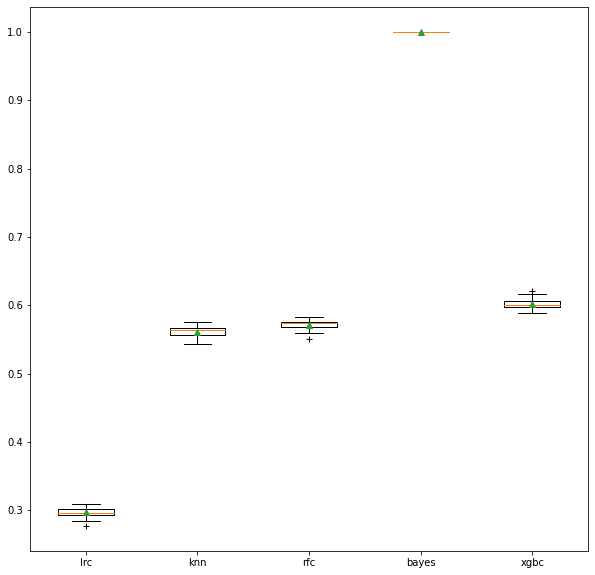

In [9]:
    
# plot model performance for comparison

plt.figure(figsize=(10,10))

fig, ax1 = plt.subplots(figsize=(10, 10))

bp = ax1.boxplot(results, labels=names, showmeans=True, notch=False, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
plt.show()


#### En esta primera evaluación, obtenemos resultados similares en KNN, Random Forest y XGBoost. <br> En cambio, Logistic Regession es el del desemepeño más bajo y el Gaussian Naive Bayes pareciera desempeñarse de manera perfecta, pero en evaluaciones anteriores se observó que cuando su Recall es igual a 1.0, tiene una Precision muy baja por la alta cantidad de falsos positivos en su predicción.

### Evaluación de los modelos optimizados.

In [17]:

# get the models to evaluate
models = get_models_opt()


In [14]:

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    start_time = time.perf_counter_ns()
    print('>%s %.4f (%.0f)' % (name, gmean(scores), (time.perf_counter_ns() - start_time)))
    

>lrc 0.2971 (263200)
>knn 0.5761 (106400)
>rfc 0.5712 (158900)
>bayes 0.5367 (106200)
>xgbc 0.6152 (116000)


<Figure size 720x720 with 0 Axes>

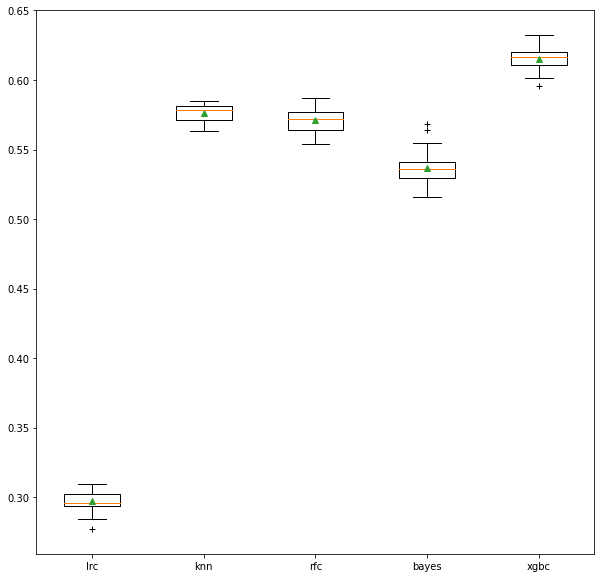

In [15]:

# plot model performance for comparison

plt.figure(figsize=(10,10))

fig, ax1 = plt.subplots(figsize=(10, 10))

bp = ax1.boxplot(results, labels=names, showmeans=True, notch=False, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
plt.show()


#### Despúes de las optimizaciones prácticamente todos los modelos mejoraron, (a excepción del Gaussian NB, ya que este empeoró su métrica de Recall, pero mejoró en cuanto al Precision). <br> El modelo más destacado fue el XGBoost. que mejora en más de un 30% el desempeño de nuestro modelo base (Logistic Regression) y además tiene menor tiempo de ejecución que este modelo.